In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import glob

In [2]:
# Define paths to the images and masks folders
images_folder = 'data/images'
masks_folder = 'data/masks'

In [3]:
sample = 5

## Image and Mask Loading:

- glob.glob is used to collect paths for images and masks in the dataset.
- Each image is loaded in UNCHANGE mode to preserve all bands, and each mask is loaded in grayscale.

In [4]:
# Get a list of image and mask file paths
image_paths = sorted(glob.glob(os.path.join(images_folder, '*.png')))
mask_paths = sorted(glob.glob(os.path.join(masks_folder, '*.png')))

## Lake Area Calculation:

- For each mask, the lake area is calculated by counting the pixels with non-zero values (representing the lake).
- This information is stored in the lake_areas list.

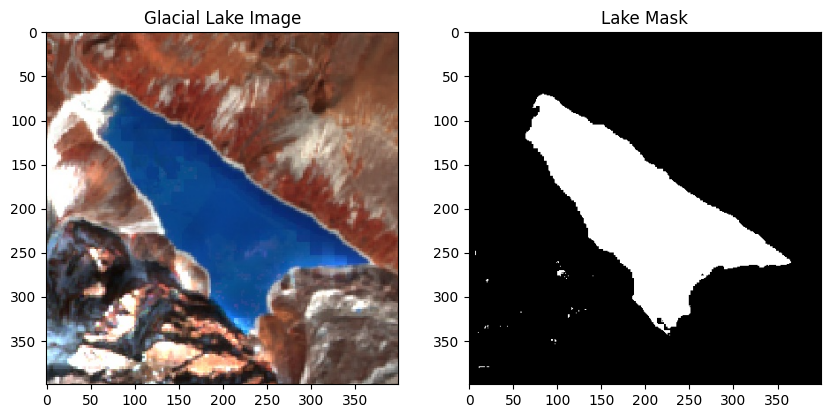

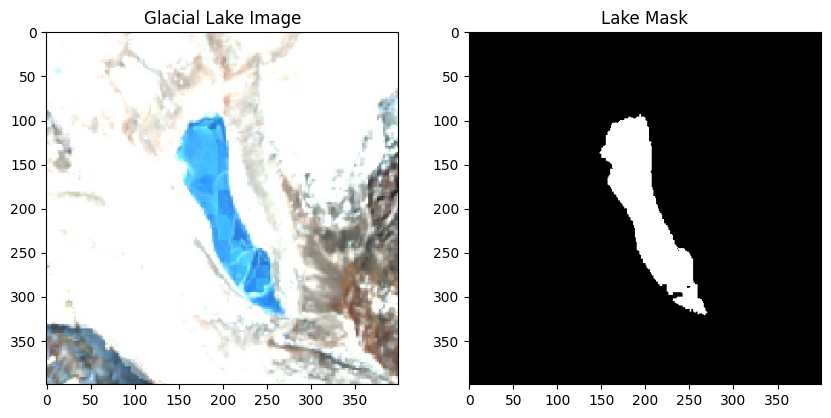

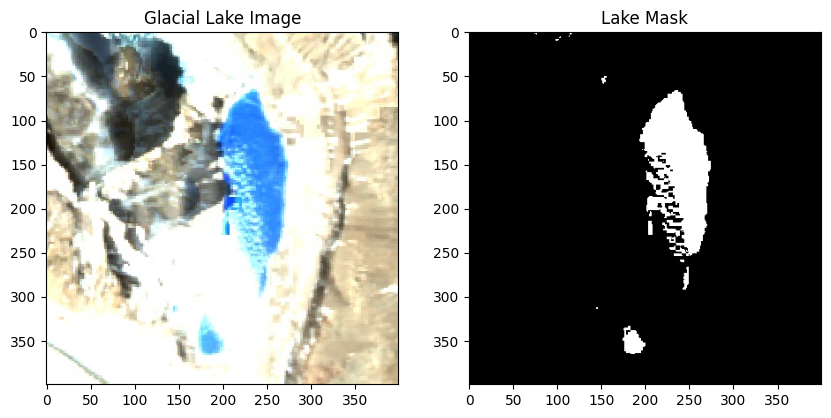

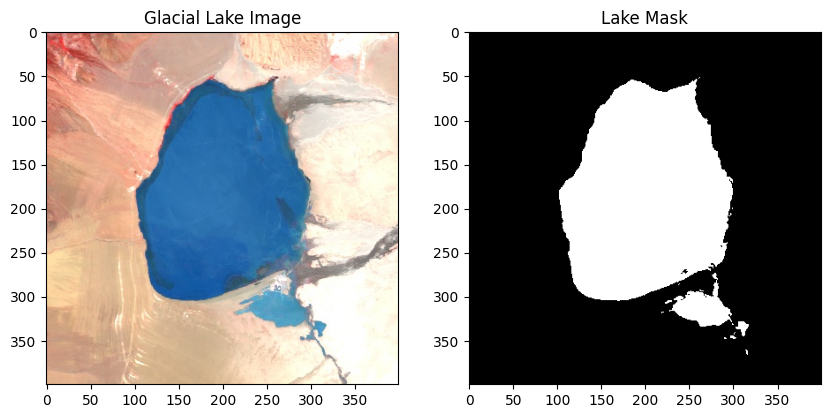

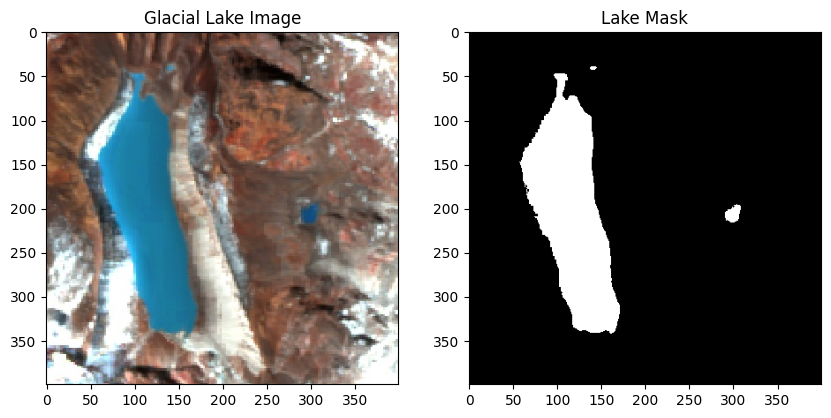

In [5]:
lake_areas = [] # list to store lake areas in pixels

for img_path, mask_path in zip(image_paths[:sample], mask_paths[:sample]): 
# Looping through a few samples of images and masks for initial
    # Load the image and mask
    image = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    
    # Calculate lake area by counting non-zero pixels in the mask
    lake_area = np.sum(mask > 0)
    lake_areas.append(lake_area)
    
    # Display image and mask for visual verification
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.merge([image[..., 2], image[..., 1], image[..., 0]]))  # False color composite (B8, B4, B3)
    plt.title("Glacial Lake Image")
    
    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("Lake Mask")
    plt.show()


## Visualization:

- The images and masks are displayed side by side. The false-color composite is created by merging the NIR (Band 8), Red (Band 4), and Green (Band 3) bands.
- A histogram is plotted to show the distribution of lake areas across the sample masks.

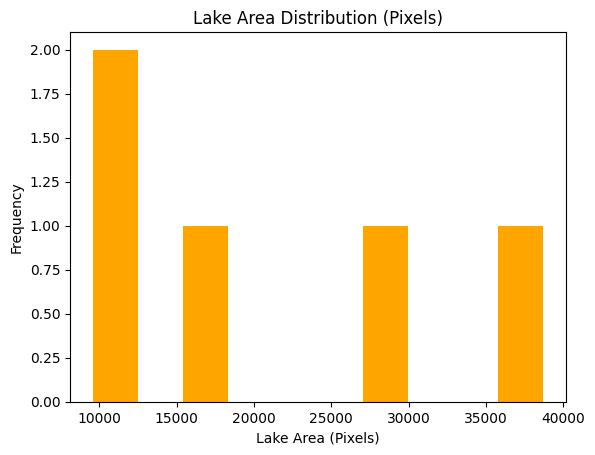

In [6]:
# Plotting the lake area distribution
plt.hist(lake_areas, bins=10, color='orange')
plt.title("Lake Area Distribution (Pixels)")
plt.xlabel("Lake Area (Pixels)")
plt.ylabel("Frequency")
plt.show()

In [7]:
print(f"Lake areas (in pixels) for the first {sample} samples:", lake_areas)

Lake areas (in pixels) for the first 5 samples: [29514, 9564, 9595, 38725, 17582]



## Output of Lake Areas:

The calculated lake areas (in pixels) for the analyzed images are printed for quick reference.